In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import neighbors

In [2]:
## Input data generation
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1.0, 0.1], [0.1, 1.1]])

mean_02 = np.array([5.0, 6.0])
cov_02 = np.array([[1.2, 0.2], [0.2, 1.5]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print dist_01.shape
print dist_01.shape



(500, 2)
(500, 2)


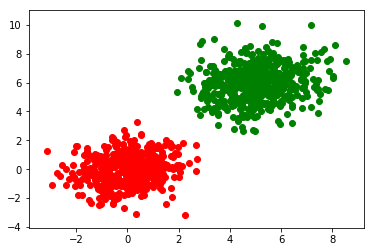

In [3]:
for ix in range(dist_01.shape[0]):
    plt.scatter(dist_01[ix, 0],dist_01[ix, 1],c='r')
    plt.scatter(dist_02[ix, 0],dist_02[ix, 1],c='g')
plt.show()
    

In [4]:
rows = dist_01.shape[0] + dist_02.shape[0]
cols = dist_01.shape[1] + 1

data = np.zeros((rows, cols))
print data.shape

(1000, 3)


In [5]:
data[:dist_01.shape[0], :-1] = dist_01
data[dist_01.shape[0]:dist_01.shape[0]+dist_02.shape[0], :-1] = dist_02 ## dist_01.shape[0]+dist_02.shape[0] can be removed
data[dist_01.shape[0]:dist_01.shape[0]+dist_02.shape[0], -1] = 1.0
print data.shape 

(1000, 3)


In [6]:
np.random.shuffle(data)
print data[:10]

[[-1.28442359  0.65775287  0.        ]
 [ 0.35633093 -0.10871143  0.        ]
 [-0.1218282  -1.10981543  0.        ]
 [ 0.52775124  1.19626851  0.        ]
 [ 3.11304804  4.70585956  1.        ]
 [-0.47012476  1.08656499  0.        ]
 [-1.10170946  0.86541445  0.        ]
 [ 6.80303471  6.29412113  1.        ]
 [-2.3712621  -0.00844636  0.        ]
 [-0.88347733 -1.40586087  0.        ]]


In [7]:
## Testing training split
split_factor = 0.85
split  = int(data.shape[0]*split_factor)
train_data = data[:split]
# print test_data.shape
test_data = data[split:]
# print train_data.shape

x_train = train_data[:,:-1]
y_train = train_data[:,-1]

x_test = test_data[:,:-1]
y_test = test_data[:,-1]
print x_test.shape
print y_test.shape

(150, 2)
(150,)


In [8]:
print np.unique(y_train, return_counts = True)
print np.unique(y_train)

(array([0., 1.]), array([422, 428]))
[0. 1.]


In [9]:
def distance(p1, p2):
    '''Eucledian Distance'''
    dist = np.sqrt(((p1-p2)**2).sum())
    return dist
print(distance(np.array([0.0,0.0]), np.array([1.0,1.0])))

1.4142135623730951


In [10]:
def manDistance(p1, p2):
    '''Eucledian Distance'''
    dist = (np.abs(p1-p2).sum())
    return dist
print(manDistance(np.array([0.0,0.0]), np.array([1.0,1.0])))

2.0


In [11]:
# np.matmul? ## For matrix multiplication

In [12]:
## K-=Nearest Neighbours
def KNN(test_point,x_train,y_train,k=13):
    '''This function returns a predicted label for a test data'''
    d = []
    for ix in range(x_train.shape[0]):
        dist = distance(test_point,x_train[ix])
        d.append((dist,y_train[ix]))
    d = np.array(d)
    sorted_vals = sorted(d, key = lambda z:z[0]) ## To sort on the basis of a col
    sorted_vals = np.array(sorted_vals)[:k]
    freq = np.unique(sorted_vals[:,-1], return_counts = True)
    label = freq[0][freq[1].argmax()]
    return label
    
    

In [13]:
x = np.array([1, 2, 3, 6, 7, 3, 1])
print x.max()  ## Returns max value of list
print x.argmax() ## Returns index of max value of list

7
4


In [14]:

def getAcc(x_test,y_test,x_train,y_train,k=13):
    data = 0.0
    for ix in range(x_test.shape[0]): 
        data += (KNN(x_test[ix],x_train,y_train,k) == y_test[ix])
    return data/(x_test.shape[0])
# print data
# print float(data)/(x_test.shape[0])


In [15]:
# data1 = np.sum( KNN(x_test,x_train,y_train,5) == y_test )
# print float(data1)/x_test.shape[0]

In [16]:
ds_test = pd.read_csv('./fashionmnist/fashion-mnist_test.csv')
ds_train = pd.read_csv('./fashionmnist/fashion-mnist_train.csv')

In [17]:
fashion_data_train = ds_train.values
print fashion_data_train.shape
x_train = fashion_data_train[:1000,1:]
y_train = fashion_data_train[:1000,0]

fashion_data_test = ds_test.values
print fashion_data_test.shape
x_test = fashion_data_test[:200,1:]
y_test = fashion_data_test[:200,0]

print(getAcc(x_test,y_test,x_train,y_train,13))

(60000, 785)
(10000, 785)
0.735


In [18]:
ds_test.head(n=1)
fashion_data_test = np.array(fashion_data_test)

(28, 28)
[[  0   0   0   0   0   0   0   9   8   0   0  34  29   7   0  11  24   0
    0   3   3   1   0   1   1   0   0   0]
 [  0   0   4   0   0   1   0   0   0   0   0  44  88  99 122 123  80   0
    0   0   0   1   1   1   0   0   0   0]
 [  0   0   1   2   0   0   0   3  46 174 249  67   0  94 210  61  14 212
  157  37   0   0   0   0   1   0   0   0]
 [  0   0   2   2   0  23 168 206 242 239 238 214 125  61 113  74 133 236
  238 236 203 184  20   0   1   0   0   0]
 [  0   0   1   0   0 175 245 223 207 205 206 216 255 237 251 232 223 212
  200 205 216 249 173   0   0   2   0   0]
 [  0   0   7   0  53 225 201 197 200 201 206 199 197 185 194 204 232 226
  249 219 194 205 229  33   0   1   0   0]
 [  0   0   1   0 133 223 208 192 195 233 226 216 191 210 188 236 186   0
   50 234 207 208 231 133   0   0   0   0]
 [  0   0   0   0 216 218 216 194 229 172  64 219 201 200 200 247  68  72
   54 165 237 212 219 226   0   0   0   0]
 [  0   0   0  50 221 207 220 211 207 165 138 205 192 1

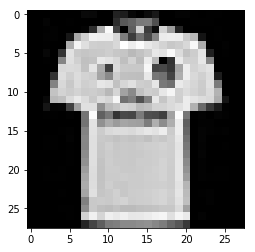

In [21]:
img = np.reshape(fashion_data_test[0,1:],(28,28))
print img.shape
print img
plt.imshow(img,cmap='gray')
    

In [20]:
## KNN using scikit learn
cls = neighbors.KNeighborsClassifier()
cls.fit( x_train, y_train )
cls.score(x_test, y_test)

0.745